In [1]:
import numpy as np                          #importing the important libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('cardio_train.csv')
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1


In [10]:
df['age'] = df['age']/365.25
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.516769,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.104038,1,163,71.0,110,70,1,1,0,0,1,1


In [11]:
df.shape

(69301, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  float64
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


Here we can see that no null values are present in the data set

In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.302632,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.754995,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.563313,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.361396,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.946612,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.387406,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.922656,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The max height given is 250 cms and this is over 8 feet. This column can have outliers.
ap_lo and ap_hi also has outliers because the max value is not seen in real life.

In [16]:
df.drop('id', axis = 1, inplace = True)

removing the column that is not going to contribute in decision making

In [17]:
df.drop_duplicates(inplace=True)

removing the duplicates if present

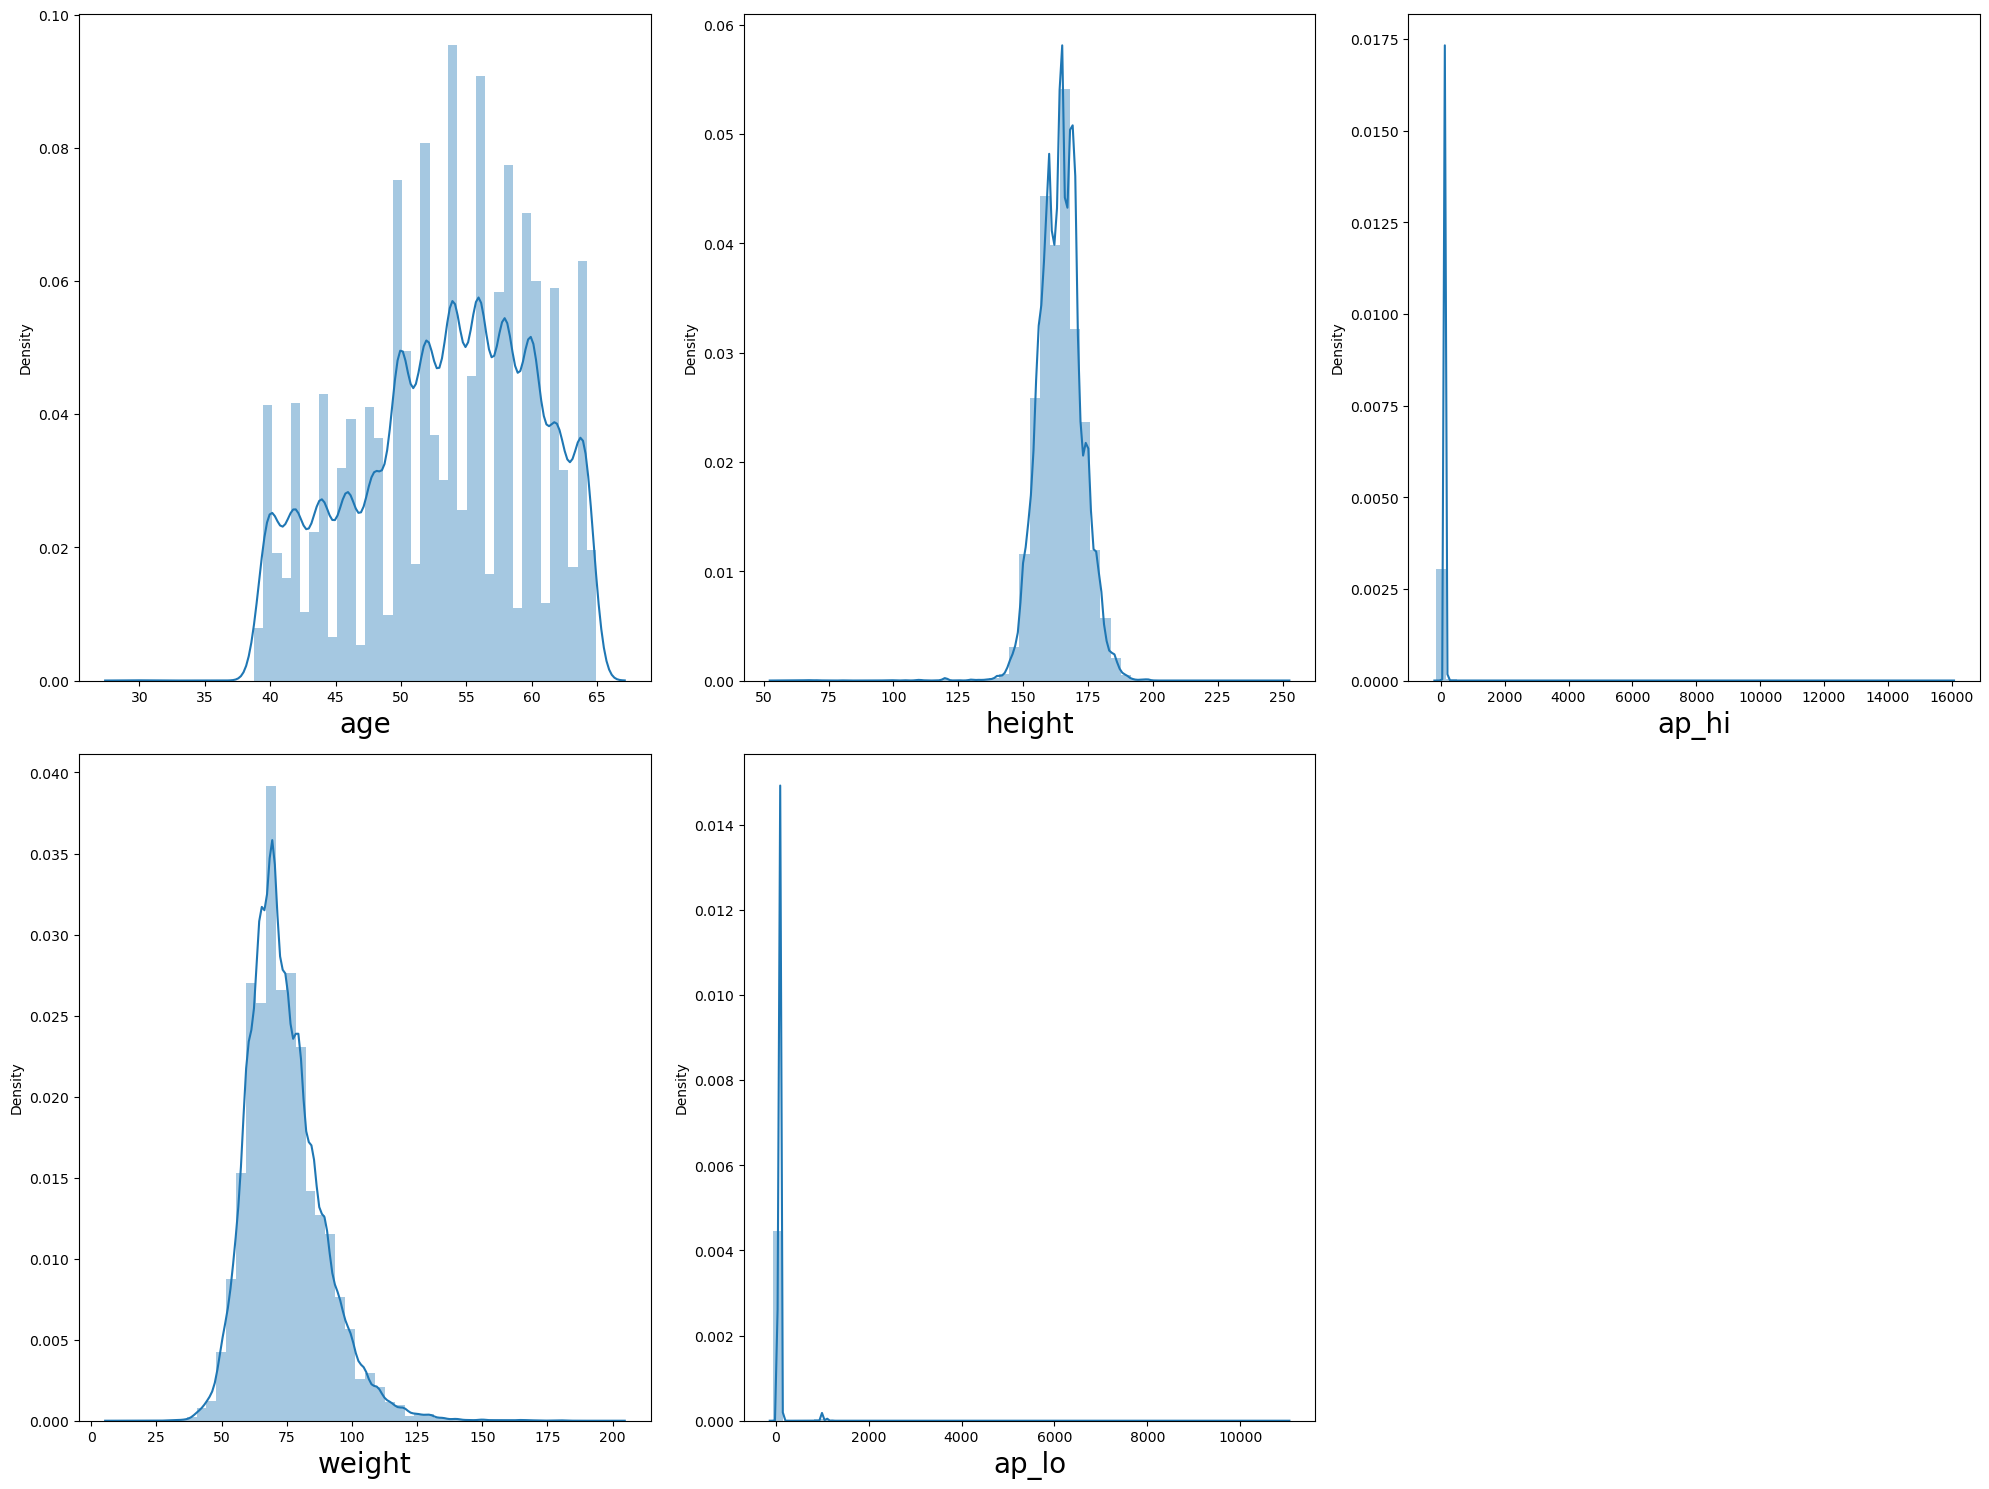

In [18]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

There is skewness in all the columns

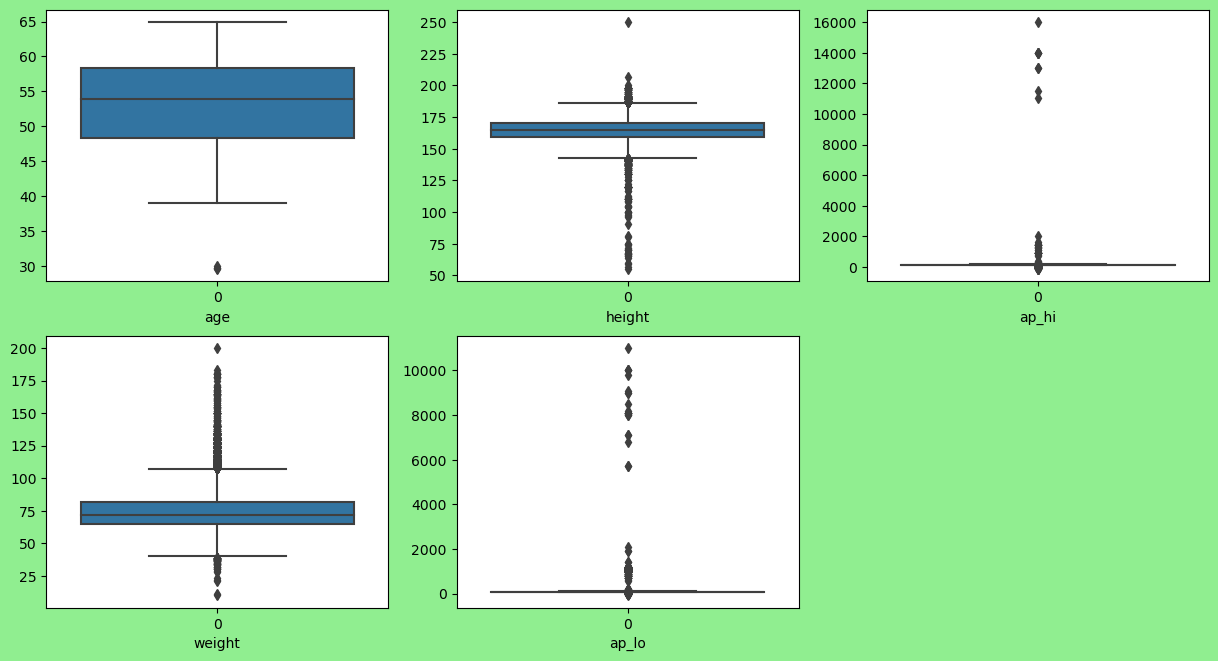

In [20]:
plt.figure(figsize=(15,12), facecolor = 'lightgreen')
graph = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if graph<=6:    
        ax = plt.subplot(3,3,graph)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize=10)      
    graph+=1
plt.show()

we can clearly see the outliers in various columns. Lets remove the outliers with Z scores

In [21]:
from scipy.stats import zscore

z_score = zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)   # Apply the formula and get the scaled data

filtered_entry = (abs_z_score < 3).all(axis=1)

df = df[filtered_entry]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,53.297136,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,6.754388,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,39.082820,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.350445,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.941136,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.381930,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


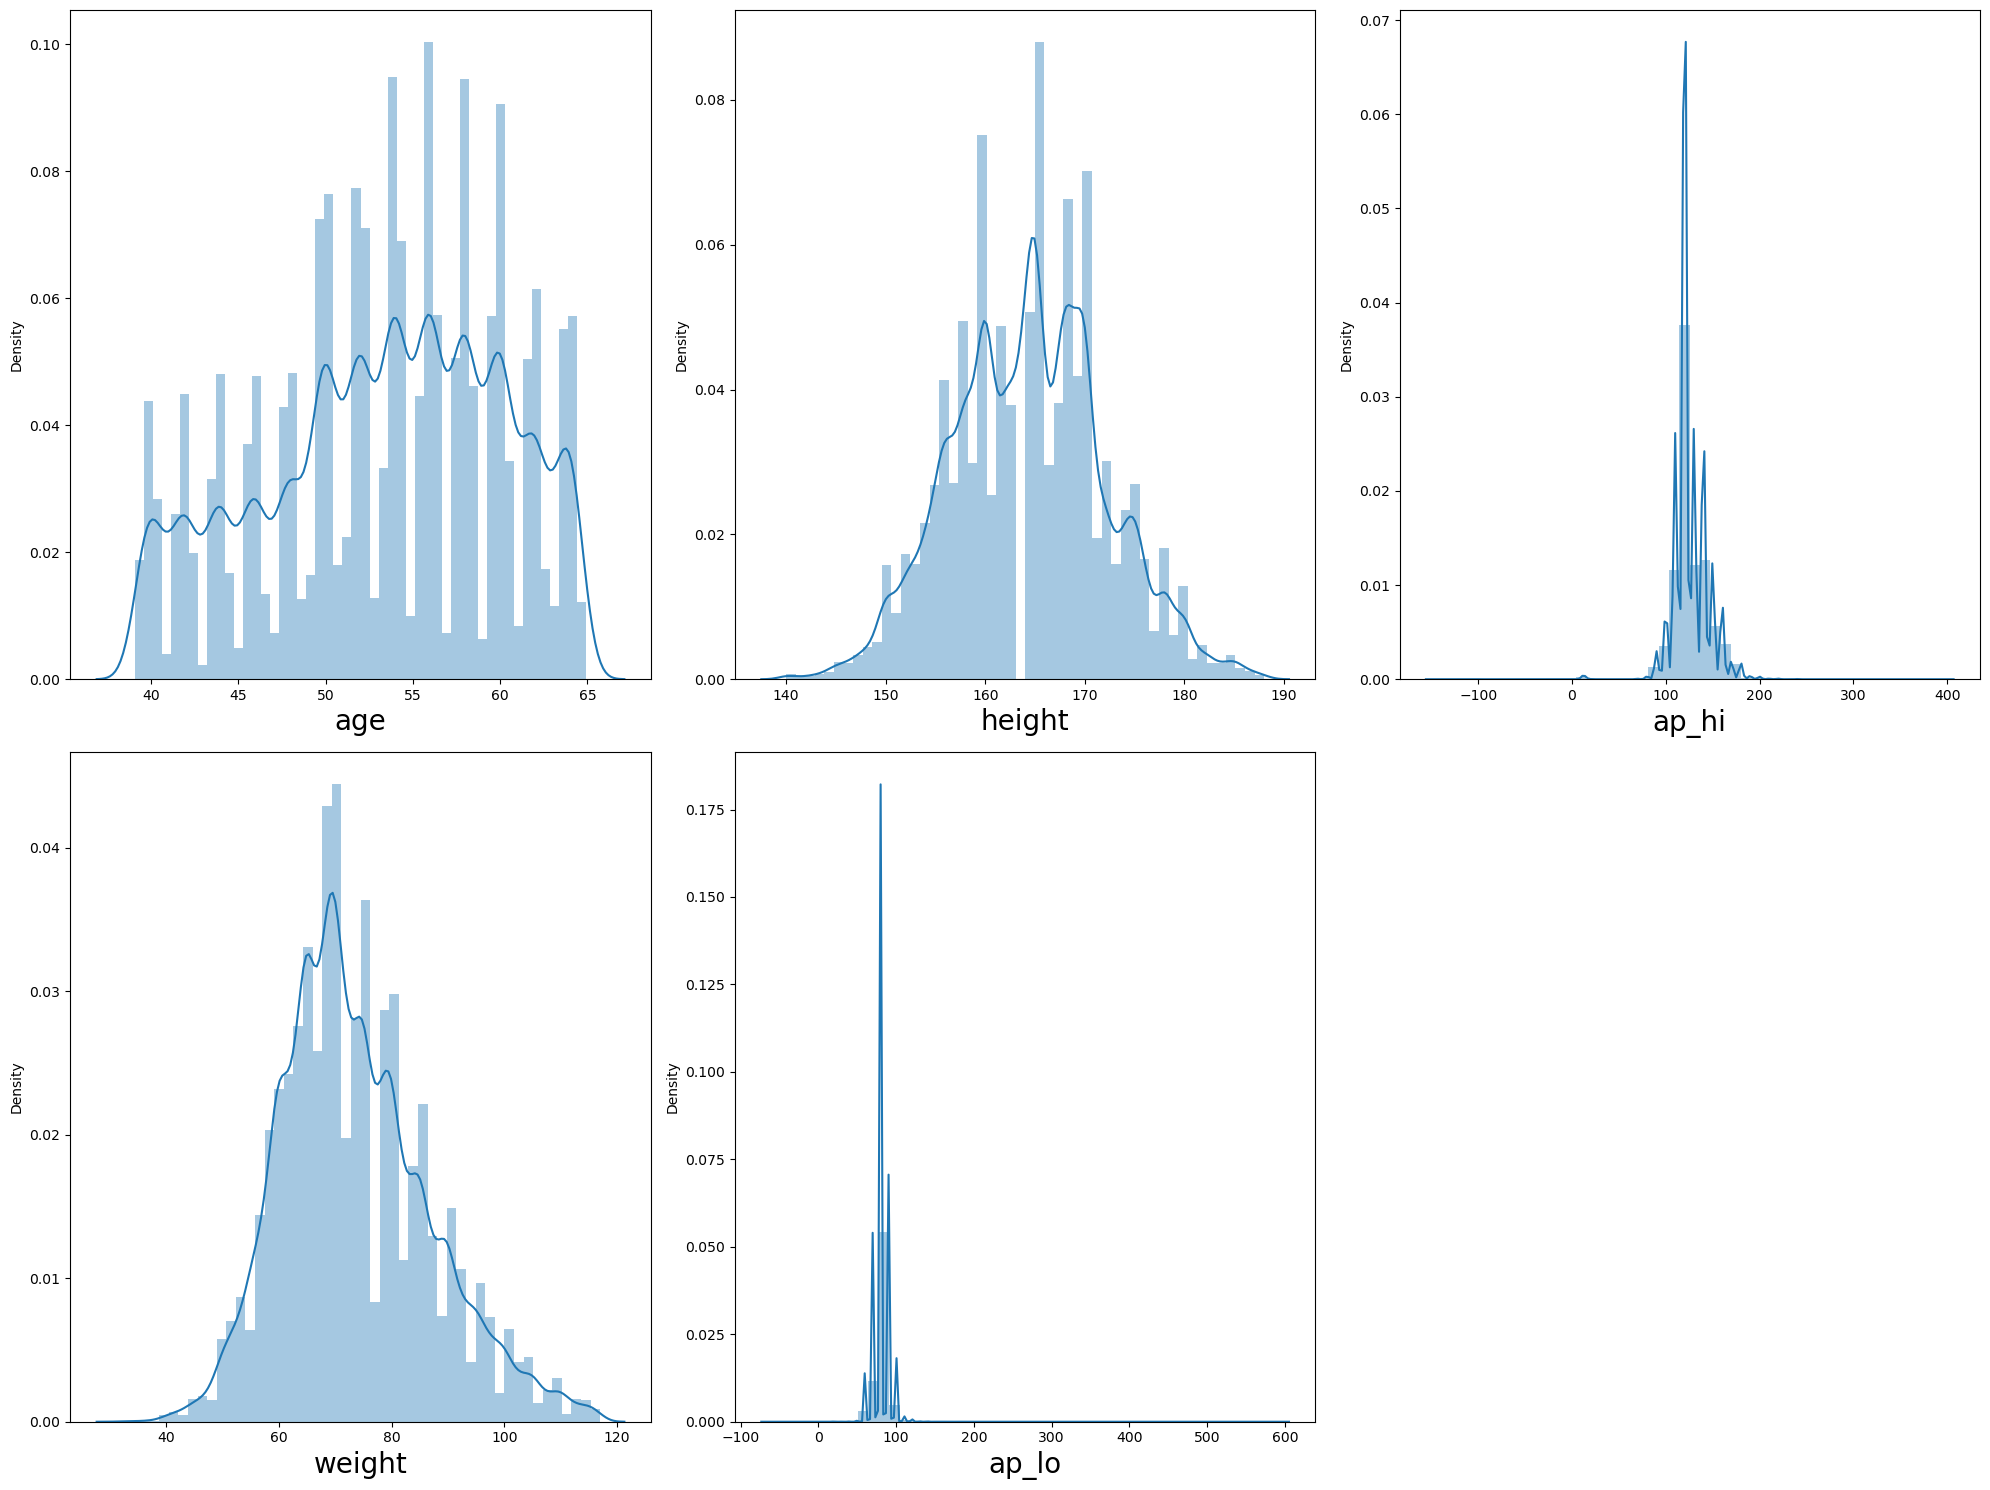

In [22]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

We are able to bring down skewness 

In [23]:
# separating the features and labels
X = df.drop(columns=['cardio'], axis=1)
y = df['cardio']

In [25]:
# standardization of data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [28]:
# we have to check the multicollinearity of the independent variables.
# we will check for multicollinearity using VIF(Variance Inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif_score"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif_score,Features
0,1.071123,age
1,1.507506,gender
2,1.519844,height
3,1.221738,weight
4,1.658717,ap_hi
5,1.607891,ap_lo
6,1.317412,cholesterol
7,1.257853,gluc
8,1.248261,smoke
9,1.139820,alco


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. We are going to use random forest classifier for this.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=.30,random_state=41)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(clf,param_grid=params)
grd.fit(X_train,Y_train)
print ('best_params = > ', grd.best_params_)

clf = grd.best_estimator_    # reinstantiating with best params

clf.fit(X_train,Y_train)
y_pred = clf.predict(x_test)


rf_conf_mat = confusion_matrix(y_test,y_pred)

print ('\n', rf_conf_mat)

print ('\n', accuracy_score(y_test,y_pred))

best_params = >  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

 [[8055 2188]
 [3159 6806]]

 0.735401821060966


In [33]:
report = classification_report(y_test,y_pred)
print (report)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10243
           1       0.76      0.68      0.72      9965

    accuracy                           0.74     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.74      0.74      0.73     20208

